In [1]:
import torch
import clip
from PIL import Image

In [2]:
device = "cuda"

In [4]:
model, preprocess = clip.load("ViT-B/32",device = device);


In [8]:
keypoints = [
    "left eye",
    "right eye",
    "nose",
    "neck",
    "root of tail",
    "left shoulder",
    "left elbow",
    "left front paw",
    "right shoulder",
    "right elbow",
    "right front paw",
    "left hip",
    "left knee",
    "left back paw",
    "right hip",
    "right knee",
    "right back paw",

]

In [9]:
category = ['gorilla',
 'spider-monkey',
 'howling-monkey',
 'zebra',
 'elephant',
 'hippo',
 'raccon',
 'rhino',
 'giraffe',
 'tiger',
 'deer',
 'lion',
 'panda',
 'cheetah',
 'black-bear',
 'polar-bear',
 'antelope',
 'fox',
 'buffalo',
 'cow',
 'wolf',
 'dog',
 'sheep',
 'cat',
 'hourse',
 'rabbit',
 'pig',
 'chimpanzee',
 'monkey',
 'orangutan']


In [10]:
template = "a {} of the animal in the photo"

In [11]:
templates = [template.format(kpt) for kpt in keypoints]

In [12]:
templates[0]

'a left eye of the animal in the photo'

In [13]:
img_path = "./data/apt36k/AP-36k-patr1/**/**/*.jpg"

In [14]:
import glob
import os
li = glob.glob(img_path)

In [15]:
import random
random.seed(42)
imgs = random.sample(li,5)

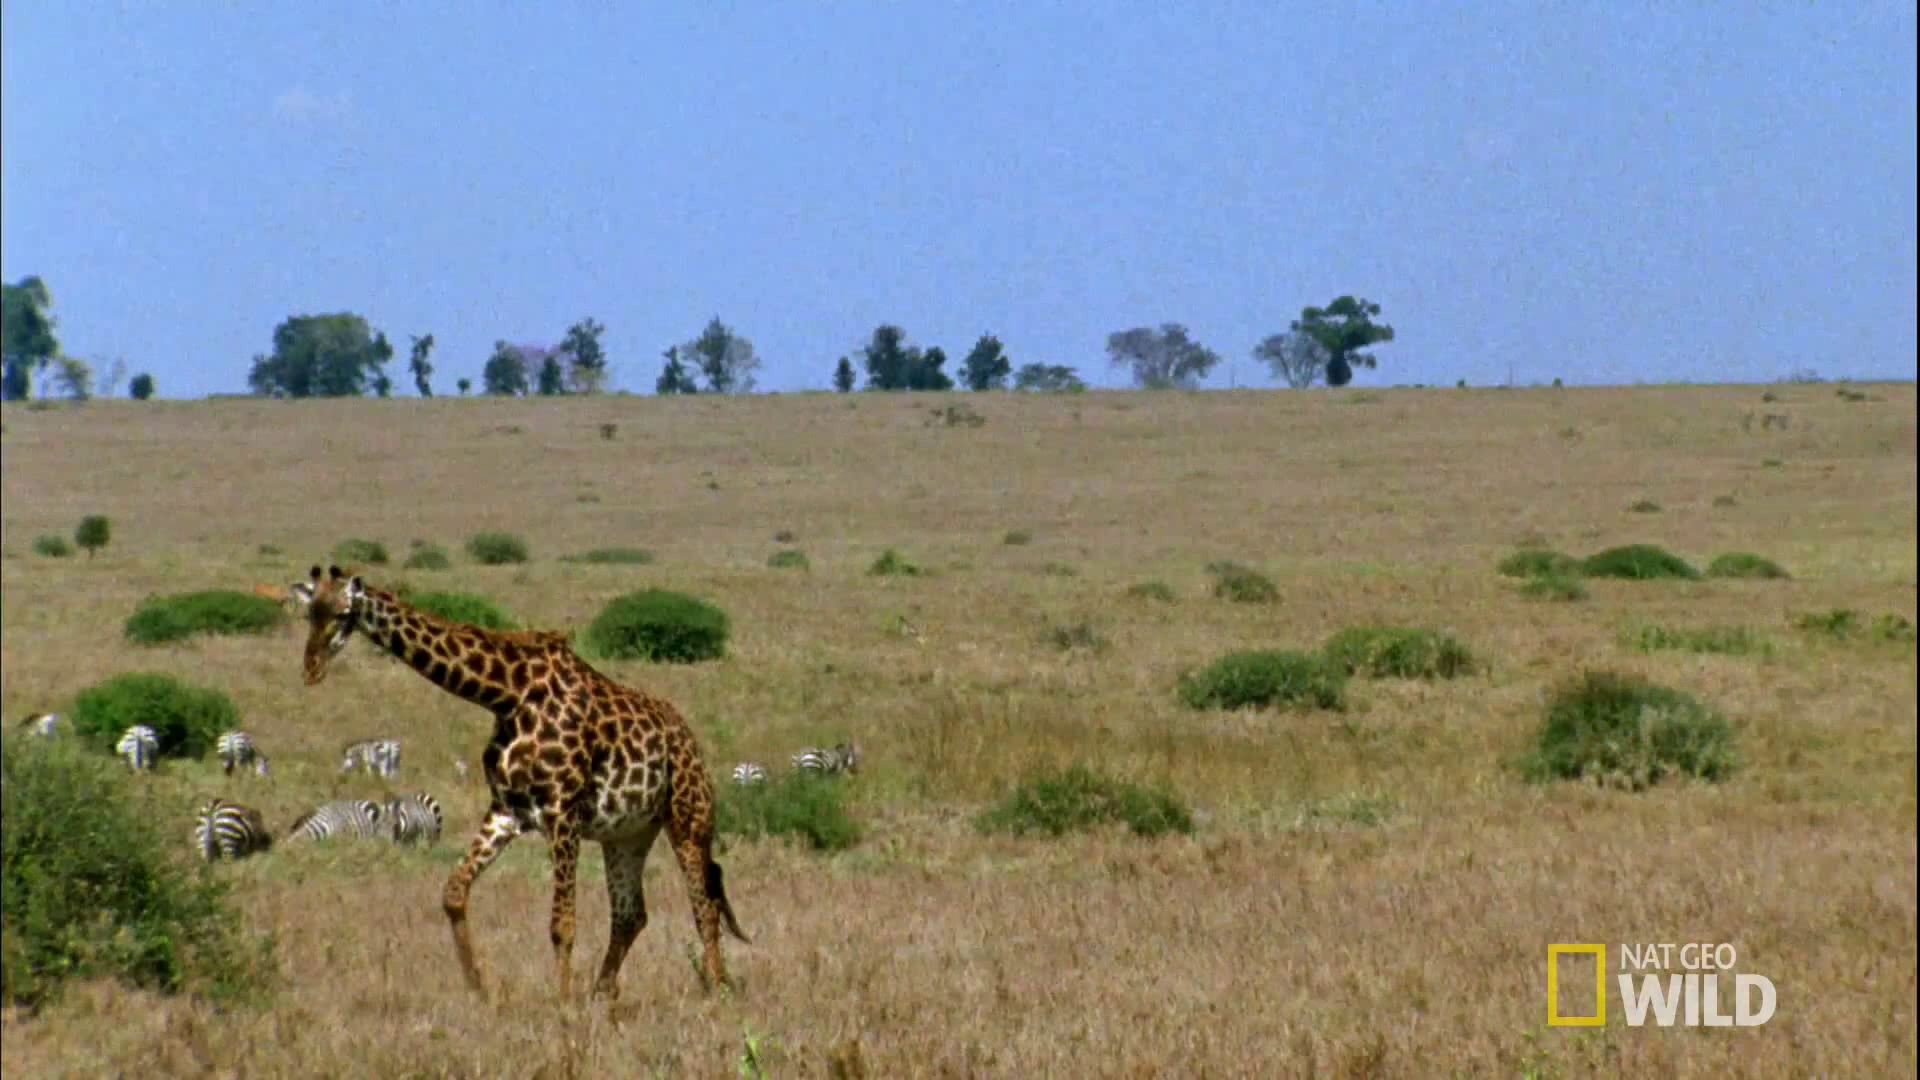

In [16]:
img = Image.open(imgs[2])
img

In [17]:
tkn = clip.tokenize(templates).to(device)


In [18]:

text_features = model.encode_text(tkn)

In [19]:
tkn = clip.tokenize(category).to(device)
text_features = model.encode_text(tkn)

In [20]:
text_features.shape

torch.Size([30, 512])

In [21]:
image_embed = preprocess(img).unsqueeze(0).to(device)

In [64]:
with torch.no_grad():
    # image_features = model.encode_image(image_embed)
    # text_features = model.encode_text(tkn)
    
    logits_per_image, logits_per_text = model(image_embed, tkn)

In [65]:
logits_per_image.shape, logits_per_text.shape

(torch.Size([1, 30]), torch.Size([30, 1]))

In [66]:
image_features.shape

torch.Size([1, 768])

In [67]:
probs = logits_per_image.softmax(-1).cpu().numpy()
probs

array([[1.954e-04, 1.558e-04, 7.534e-05, 2.069e-03, 8.898e-04, 3.538e-04,
        5.662e-06, 7.653e-05, 9.604e-01, 1.140e-04, 6.409e-04, 1.030e-04,
        1.508e-05, 2.089e-02, 1.460e-05, 2.801e-06, 1.084e-02, 7.093e-06,
        5.655e-04, 6.614e-04, 5.484e-06, 1.292e-04, 4.983e-05, 8.082e-05,
        1.090e-03, 1.001e-05, 9.656e-06, 3.223e-04, 6.104e-05, 5.662e-06]],
      dtype=float16)

In [68]:
import matplotlib.pyplot as plt

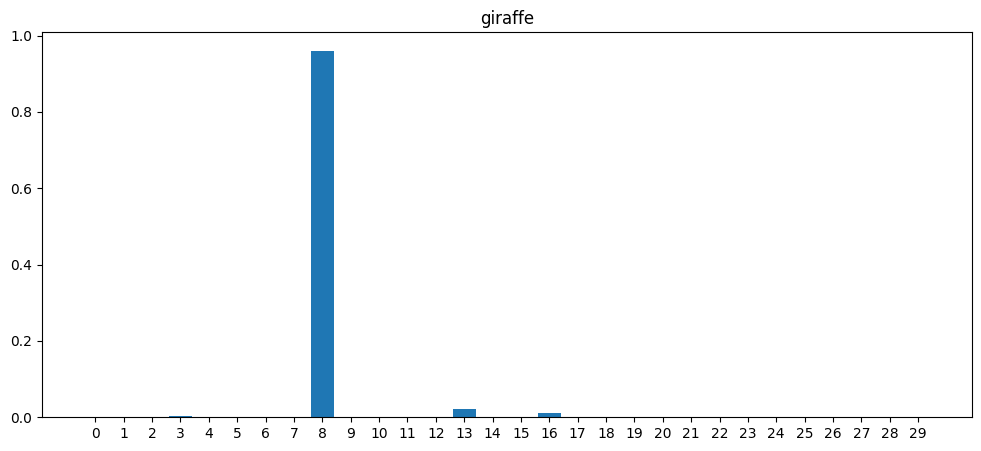

In [69]:
# plt.plot(probs[0], '.')
fig, ax = plt.subplots(1,1, figsize = (12,5))
ax.bar(range(len(probs[0])),probs[0])
ax.set_xticks(range(len(probs[0])))
ax.set_title(category[probs[0].argmax(0)])
plt.show()

In [46]:
probs[0].argmax(0)

27

In [63]:
image_embed.shape

torch.Size([1, 3, 224, 224])